## Feature Extraction

In [46]:
# Importation bibliotheque 

In [47]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Feature Extraction using PCA:


Feature extraction is the process of deriving new features from the existing ones to improve model performance or reduce computational cost.  
* Feature extraction using Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

#### Feature Extraction using PCA:

PCA aims to reduce the dimensionality of the dataset while preserving most of its variance.

In [44]:
# Charger les données dans un DataFrame pandas (remplacez 'data' par votre jeu de données)
data = pd.read_csv('data_cleaned .csv')

# Diviser les données en variables explicatives (X) et variable cible (y)
X = data.drop('selling_price', axis=1) # Variables indépendantes
y = data['selling_price'] # Variable dépendante

# Séparer les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Feature Extraction using PCA
pca = PCA(n_components=5)  # Extracting 5 principal components
X_pca = pca.fit_transform(X)

In [53]:
# Convert the transformed PCA data into a DataFrame
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [54]:
# Display the transformed data
print(X_pca_df.head())


            PC1         PC2        PC3       PC4       PC5
0  79842.702152 -368.815762  -2.398448 -3.338075 -0.587222
1  54343.667288  -33.876008  17.715065 -1.558947  0.453369
2  61343.292082 -159.358075   7.820006  1.764968 -0.882709
3 -20656.918938  -88.107536   3.392206 -1.777178 -0.150542
4  24343.386089  -70.096239 -15.378591  1.885431 -0.711664


Interprétons ces composantes principales :

PC1 : La valeur élevée de PC1 (79842.70 dans la première ligne) indique que cette observation est fortement influencée ou se trouve dans une direction où la variable principale (PC1) est dominante.

PC2 : La valeur plus faible de PC2 (-368.82 dans la première ligne) montre l'influence relativement moindre de cette observation dans la direction de la deuxième composante principale (PC2).

PC3, PC4, PC5 : Ces composantes représentent également des contributions respectives à la variance de chaque observation mais dans des directions différentes.

Le rôle de la sélection des caractéristiques est de choisir les caractéristiques initiales les plus significatives pour représenter ces nouvelles composantes principales. La sélection des caractéristiques identifie les attributs les plus importants qui contribuent le plus à la variance observée dans ces composantes principales.



Each principal component (PC) captures a different amount of information from our original features. PC1 holds the most significant variance, followed by PC2, and so forth.

### Feature Extraction using LDA:
LDA is a supervised technique that finds the linear combinations of features that best separate different classes.

In [55]:
# Feature Extraction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)  # Extracting 2 linear discriminants
X_lda = lda.fit_transform(X, y)
X_lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])

In [56]:
# Display the transformed data
print(X_lda_df.head())

        LD1       LD2
0  0.457692 -0.778466
1 -0.739787 -0.753532
2  1.709387 -0.493869
3 -0.923678 -0.351084
4  1.915591 -0.148503


les pondérations/coefficients les plus importants dans les composantes (LD1, LD2 pour LDA et PC1, PC2 pour PCA)

Les valeurs dans LD1 représentent les pondérations des caractéristiques qui maximisent la séparation entre les classes pour la première composante discriminante.


Dans le contexte de ces valeurs spécifiques pour LD1 et LD2 :

LD1 et LD2 représentent les deux premières composantes (ou axes) obtenues après avoir appliqué l'Analyse Discriminante Linéaire (LDA) sur les données.
Chaque observation (ligne) dans le tableau est représentée par des valeurs LD1 et LD2, qui sont les coordonnées de cette observation dans le nouvel espace caractéristique créé par LDA.
Ces nouvelles composantes (LD1, LD2) sont conçues pour maximiser la séparation entre différentes classes de données. Chaque dimension (LD1, LD2) est une combinaison linéaire des caractéristiques initiales et est optimisée pour maximiser la variance entre les classes tout en minimisant la variance à l'intérieur des classes.

## Feature Selection

##  Feature selection techniques that are easy to use and also gives good results.

1. Univariate Selection

2. Correlation Matrix with Heatmap

3. Feature Importance



1. 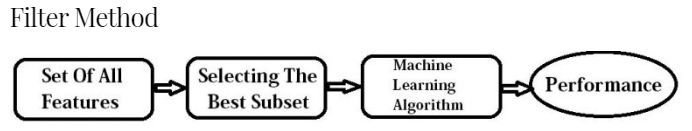

2. 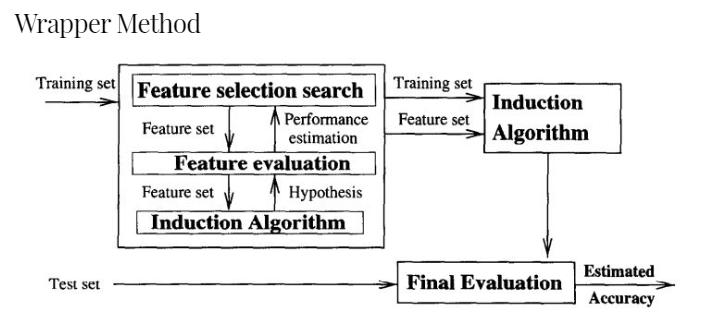


1. __Forward Selection__: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

2. __Backward Elimination__: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

3. __Recursive Feature elimination__: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

* Sélection progressive (Forward Selection) : La sélection progressive est une méthode itérative dans laquelle nous commençons sans aucune caractéristique dans le modèle. À chaque itération, nous ajoutons la caractéristique qui améliore le mieux notre modèle jusqu'à ce qu'ajouter une nouvelle variable n'améliore pas les performances du modèle.

* Élimination régressive (Backward Elimination) : Dans l'élimination régressive, nous commençons avec toutes les caractéristiques et supprimons la caractéristique la moins significative à chaque itération, ce qui améliore les performances du modèle. Nous répétons cela jusqu'à ce qu'aucune amélioration ne soit observée lors de la suppression des caractéristiques.

* Élimination récursive de caractéristiques (Recursive Feature Elimination) : Il s'agit d'un algorithme d'optimisation avide qui vise à trouver le meilleur sous-ensemble de caractéristiques performant. Il crée de manière répétée des modèles et met de côté la meilleure ou la pire caractéristique à chaque itération. Il construit ensuite le modèle suivant avec les caractéristiques restantes jusqu'à ce que toutes les caractéristiques soient épuisées. Ensuite, il classe les caractéristiques selon l'ordre de leur élimination.

3. 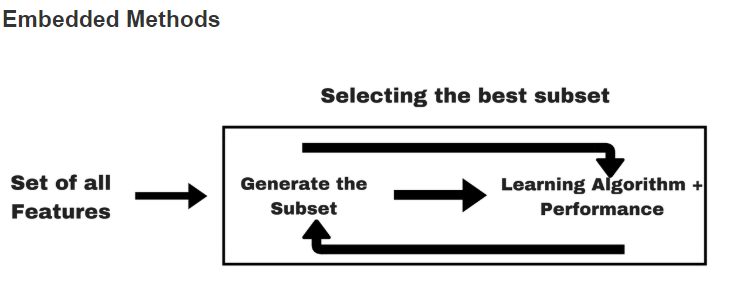

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 5 of the best features from the Mobile Price Range Prediction Dataset.



In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # Changez f_classif à chi2 pour des variables catégorielles
from sklearn.model_selection import train_test_split
import pandas as pd


# Appliquer SelectKBest pour sélectionner les meilleures caractéristiques
selector = SelectKBest(score_func=f_classif, k=5) #  le nombre de caractéristiques  sélectionner
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X.columns[selector.get_support()]

# Afficher les caractéristiques sélectionnées
print("Caractéristiques sélectionnées:", selected_features.tolist())


Caractéristiques sélectionnées: ['year', 'transmission', 'owner', 'engine', 'max_power']


In [64]:
# Sélectionner uniquement les caractéristiques spécifiées
features_to_use = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'engine', 'max_power']
X_selected = data[features_to_use]

In [71]:
# Feature Importance
model = LinearRegression()
model.fit(X, y)
feature_importance = model.coef_
print("Feature importance:", feature_importance)

Feature importance: [ 4.22506874e+04 -6.26286010e-01 -8.16837870e+04 -4.39097461e+04
 -1.74352356e+04  7.10864409e+01  3.30611150e+03]


In [65]:
# Appliquer SelectKBest pour extraire les meilleures fonctionnalités
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)

# Obtenir les scores des caractéristiques
dfscores = pd.DataFrame(fit.scores_, columns=['Score'])
dfcolumns = pd.DataFrame(X.columns, columns=['Feature'])

# Fusionner les DataFrames pour avoir un seul DataFrame avec les noms des caractéristiques et leurs scores
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
print(feature_scores)

        Feature         Score
0          year  1.829178e+01
1     km_driven  2.880688e+07
2          fuel  2.405043e+02
3  transmission  5.412080e+01
4         owner  1.335937e+03
5        engine  1.654825e+05
6     max_power  1.407237e+04


In [66]:
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)

In [67]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [68]:
featureScores

,Specs,Score
0,year,1.829178e+01
1,km_driven,2.880688e+07
2,fuel,2.405043e+02
3,transmission,5.412080e+01
4,owner,1.335937e+03
5,engine,1.654825e+05
6,max_power,1.407237e+04


In [69]:
print(featureScores.nlargest(10,'Score'))  #print  best features

          Specs         Score
1     km_driven  2.880688e+07
5        engine  1.654825e+05
6     max_power  1.407237e+04
4         owner  1.335937e+03
2          fuel  2.405043e+02
3  transmission  5.412080e+01
0          year  1.829178e+01


## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

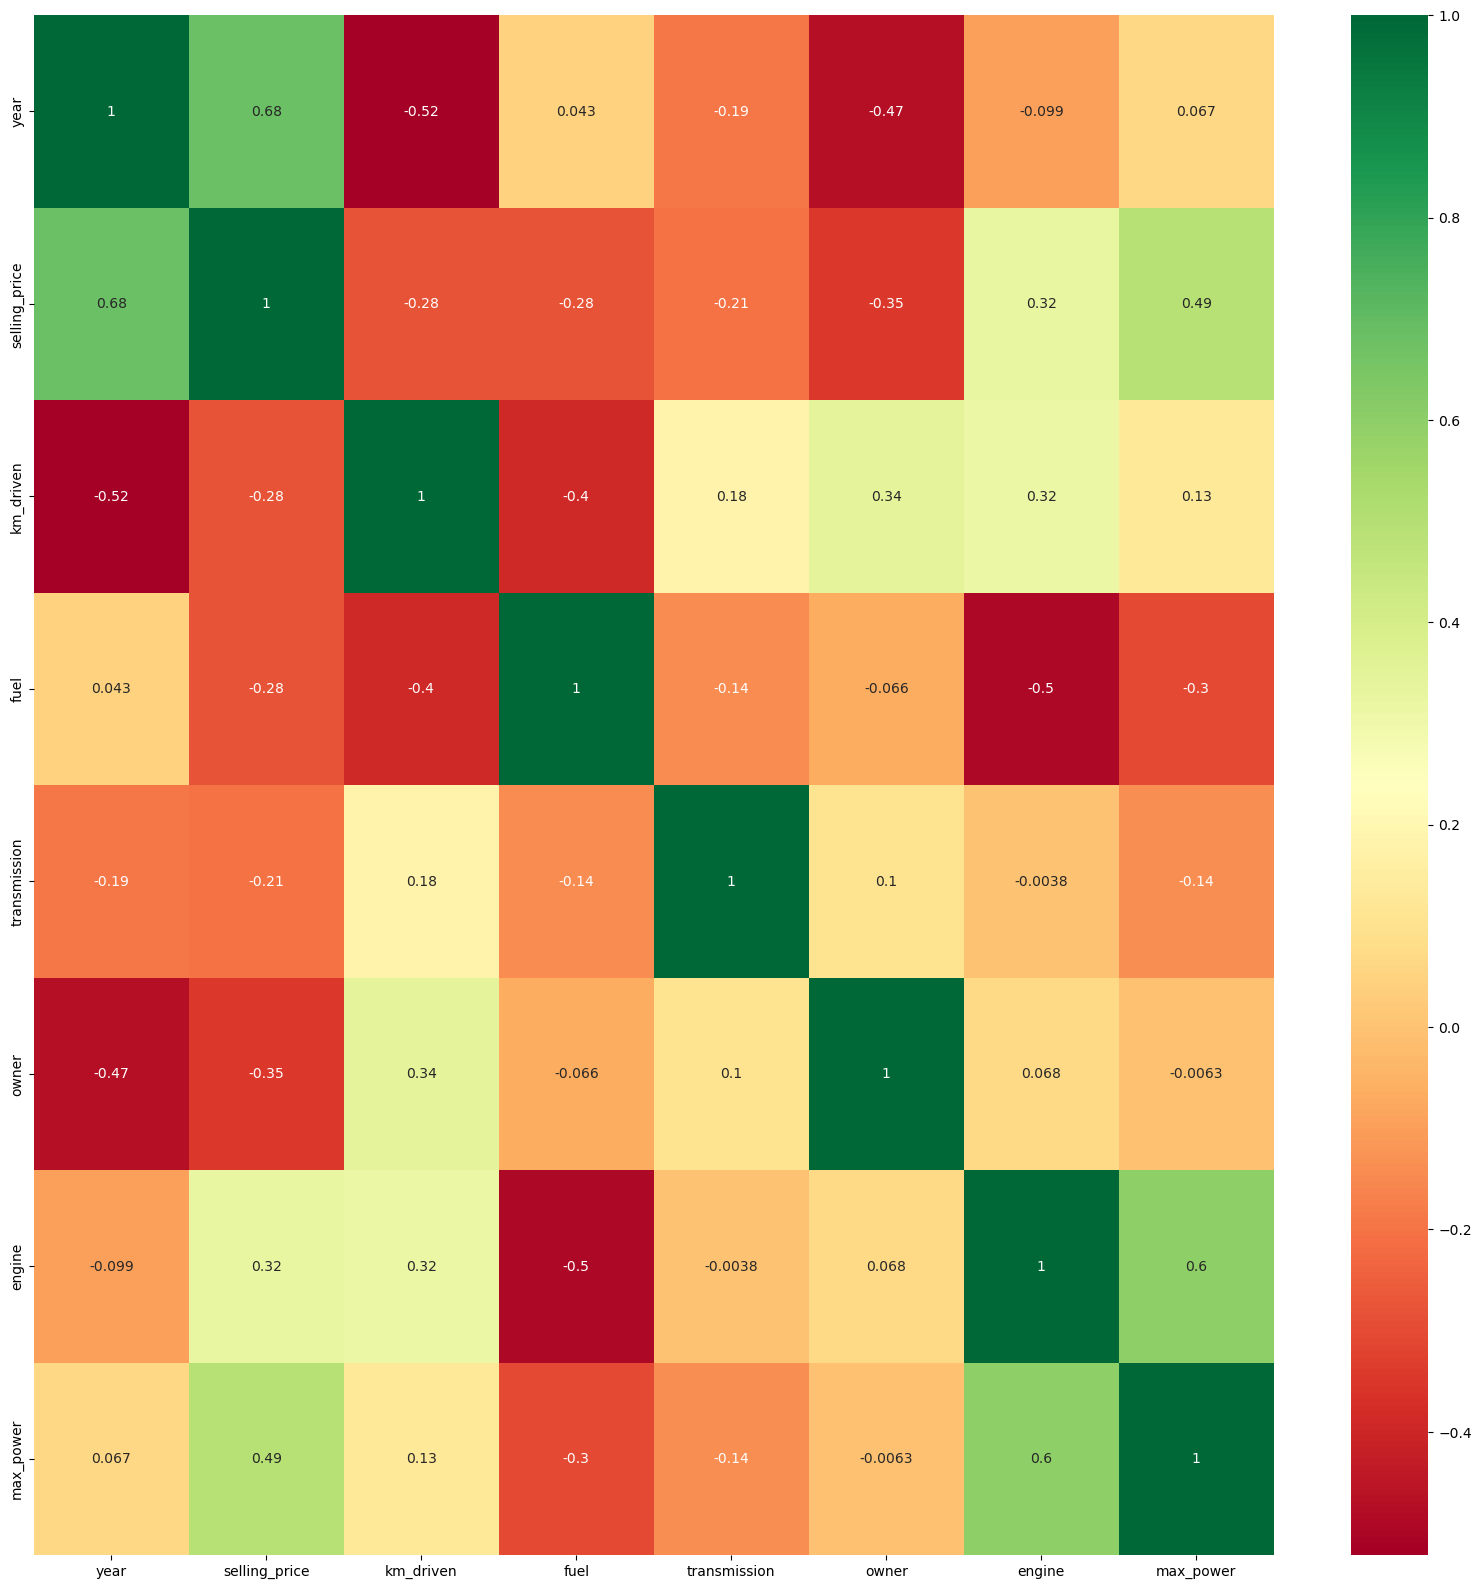

In [74]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Extra Trees Classifier for Feature Importance
Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [33]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.15369931 0.45308317 0.01477309 0.006677   0.02903866 0.11945702
 0.22327176]


La caractéristique avec l'importance la plus élevée est la deuxième avec une importance de 0.4531 km_driven , suivie de la septième caractéristique avec une importance de 0.2233.

### Plot Feature Importances

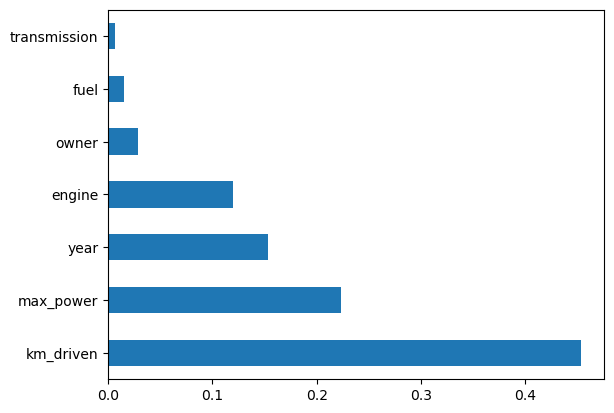

In [34]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

km_driven , max_power , year , engine, owner, fuel enfin transmission